# SPARKS FOUNDATION
# Retail Business Manager: Exploratory Data Analysis

by Vacaro - 19 Feb 2022

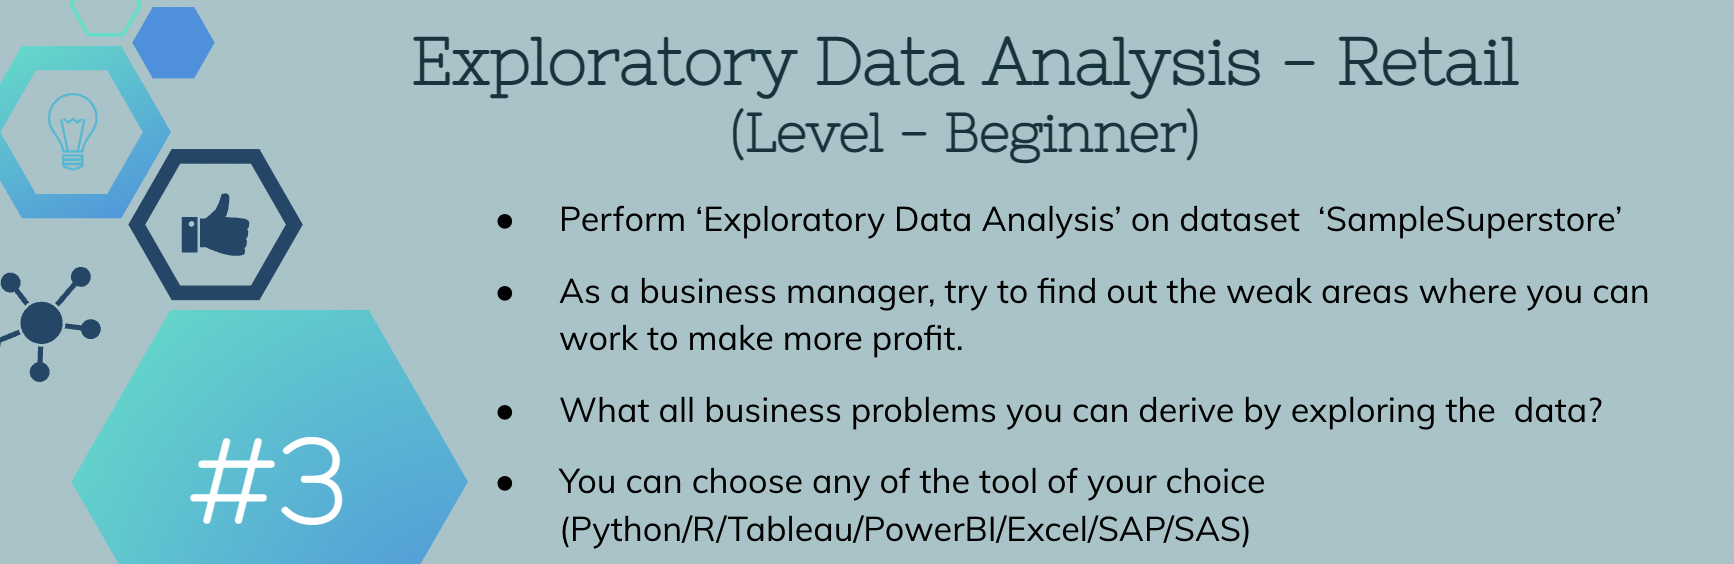

## Tasks:
##### - As a Business Manager, I need  to find out the weak areas where I can work to make more profit.
##### - What all business problems I can derive by exploring the data?

## Plan:
- High level analysis will be done using Top-Down Approach
- Starting from US Regions > Product Category > Product Sub-Category > Discount, Sales, Profits > States > City

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_og = pd.read_csv("SampleSuperstore.csv")
df_og

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [32]:
df = df_og.drop(columns= ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code','Quantity', 'Discount'])
df.head()

,Region,Category,Sub-Category,Sales,Profit
0,South,Furniture,Bookcases,261.9600,41.9136
1,South,Furniture,Chairs,731.9400,219.5820
2,West,Office Supplies,Labels,14.6200,6.8714
3,South,Furniture,Tables,957.5775,-383.0310
4,South,Office Supplies,Storage,22.3680,2.5164


# Data Pre-Processing

In [33]:
df.columns

Index(['Region', 'Category', 'Sub-Category', 'Sales', 'Profit'], dtype='object')

In [34]:
df.dtypes

# DUPLICATES Check

print("Current Number of Rows and Columns : " + format(df.shape))
print("-------------------------------------------------------")
print("Number of Duplicates : " + format(df.duplicated().sum()))


Current Number of Rows and Columns : (9994, 5)
-------------------------------------------------------
Number of Duplicates : 1137


In [35]:
# (NaN, NAN, na) VALUES CHECK

print("Number of <Nan, NAN, na> values : " + str(df.isna().sum()))

Number of <Nan, NAN, na> values : Region          0
Category        0
Sub-Category    0
Sales           0
Profit          0
dtype: int64


In [36]:
# NULL/ MISSING VALUES Check

print("Null or Missing Values : " + str(df.isnull().values.any()))

Null or Missing Values : False


In [7]:
df.describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


In [8]:
df.nunique()

Region             4
Category           3
Sub-Category      17
Sales           5825
Profit          7287
dtype: int64

In [9]:
# Object Datatypes and Unique Values

for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Region : ['South' 'West' 'Central' 'East']
West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64
_________________________________________________________________
Category : ['Furniture' 'Office Supplies' 'Technology']
Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64
_________________________________________________________________
Sub-Category : ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64
______

In [38]:
import sweetviz as sv

advert_report = sv.analyze(df)
advert_report.show_html('RetailBiz.html')

                                             |          | [  0%]   00:00 -> (? left)

Report RetailBiz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Exploratory Data Analysis

## Sales and Profit by Region
- West and East both performing well in their Regions in terms of Sales and Profit
- In this illustration, Central Region might have a problem with Higher Sales than South, but had a Lower Profit

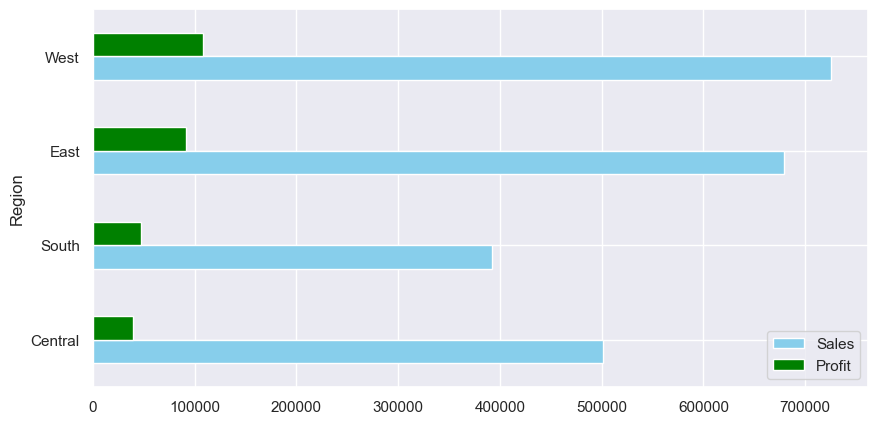

In [24]:
by_Reg = df.groupby("Region").sum().sort_values(by="Profit", ascending=True)
by_Reg.plot(kind="barh", color=["skyblue", "green"])

sns.set(rc={"figure.figsize":(10, 5)})


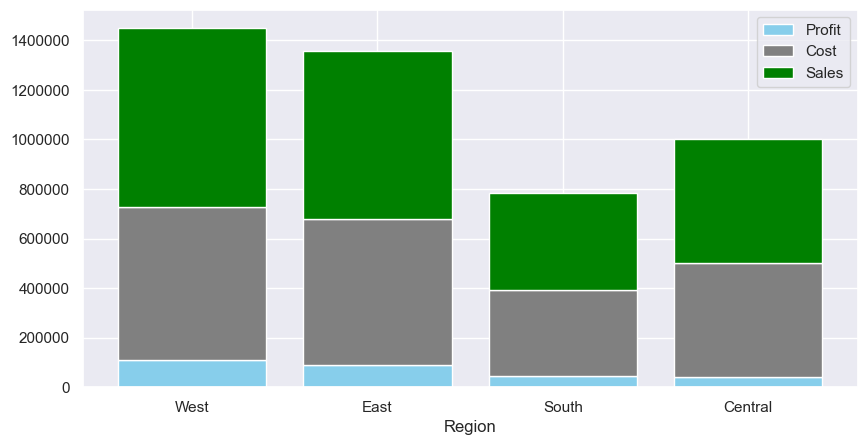

In [12]:
reset = by_Reg.reset_index().sort_values(by="Profit", ascending=False)

reset["Cost"] = reset["Sales"] - reset["Profit"]
reset

xx = reset["Region"]
y1 = reset["Profit"]
y2 = reset["Cost"]
y3 = reset["Sales"]

plt.bar(xx, y1, color='skyblue')
plt.bar(xx, y2, bottom=y1, color='gray')
plt.bar(xx, y3, bottom=y1+y2, color='green')
        
plt.xlabel("Region")
plt.legend(["Profit", "Cost", "Sales"])
plt.show()

In [13]:
reset.head()

,Region,Sales,Profit,Cost
3,West,725457.8245,108418.4489,617039.3756
2,East,678781.2400,91522.7800,587258.4600
1,South,391721.9050,46749.4303,344972.4747
0,Central,501239.8908,39706.3625,461533.5283


## Sales and Profit by Region and Category
- Technology product category dominates both Sales and Profit comapred to Furniture and Office Supplies at all Regions
- Looking at the first row, we can see that we have low Sales in Office Supplies compared to Furniture and Technology
- On the second row,  Furniture category had the lowest Profit above all with East and Central not contributing enough Profit
- We will check the specifics of Central Region why we got High Sales but Lower Profit on both Furniture and Office Supplies category

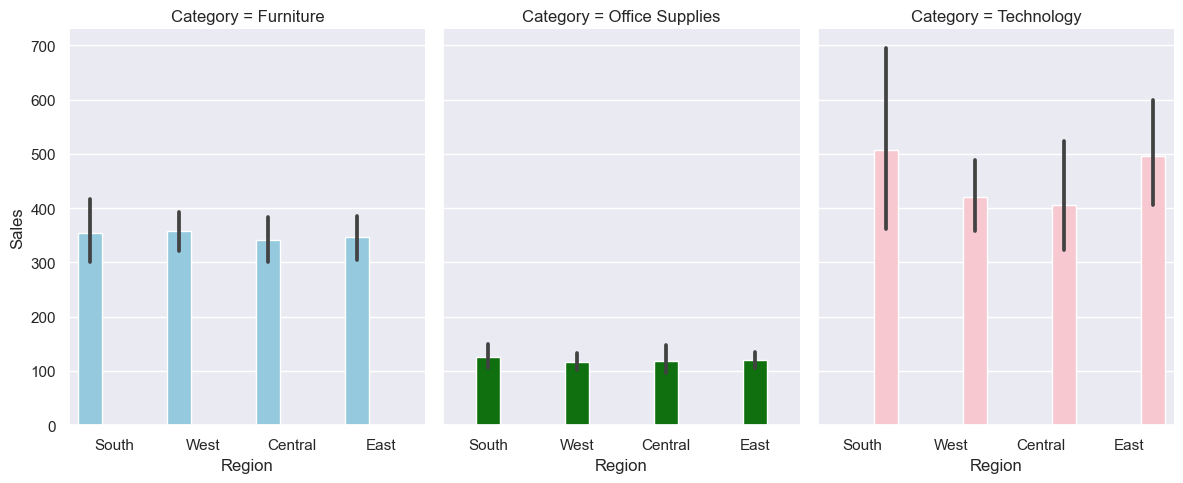

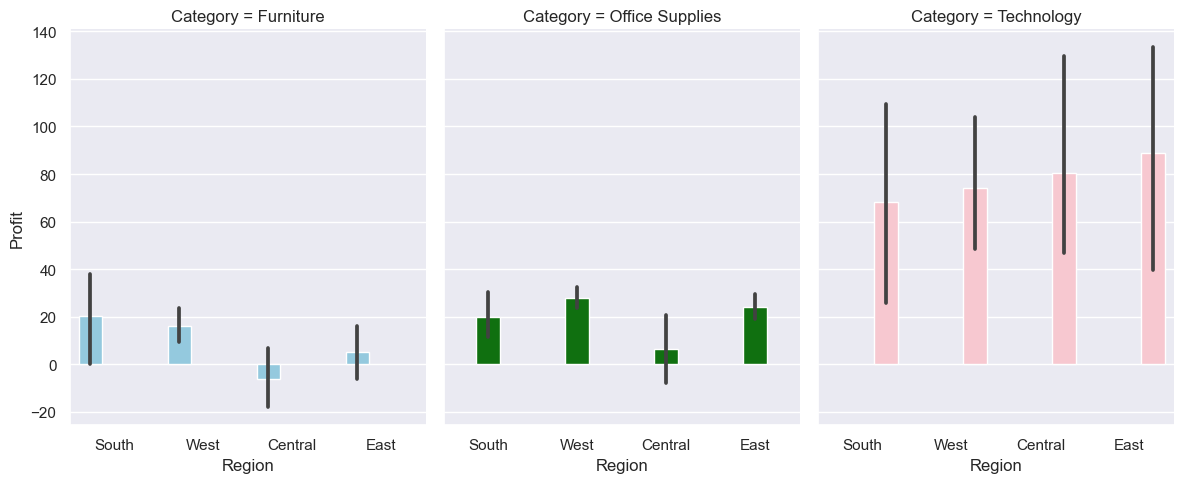

In [14]:
palette = ["skyblue", "green", "pink"]

# SALES
g = sns.catplot(x="Region", y="Sales",
                hue="Category", col="Category",
                data=df_og, kind="bar",
                height=5, aspect=.8, palette = palette);

# PROFIT
g2 = sns.catplot(x="Region", y="Profit",
                hue="Category", col="Category",
                data=df_og, kind="bar",
                height=5, aspect=.8, palette = palette);


In [15]:
central = df[df["Region"] == "Central"]
central = central.groupby("Sub-Category",as_index=False).sum().sort_values(by="Profit",ascending=True).drop(columns = ["Sales"])

central_disc = df_og[df_og["Region"] == "Central"]
central_disc = central_disc.groupby("Sub-Category",as_index=False).sum().sort_values(by="Discount", ascending=False).drop(columns=["Postal Code","Sales","Quantity"])


## Profit by Central Region
- Illustrated below under Sub-Category items, there are 7 Items where Profit declined negatively which needs to identify the root causes of these dropped
- One cause might be due to the given discounts on these 7 sub-categories in the central region.
- Highest Discounts given were visible for the top 4 products in the left [Binders, Furnishings, Appliances, Paper] -- greater than 40%

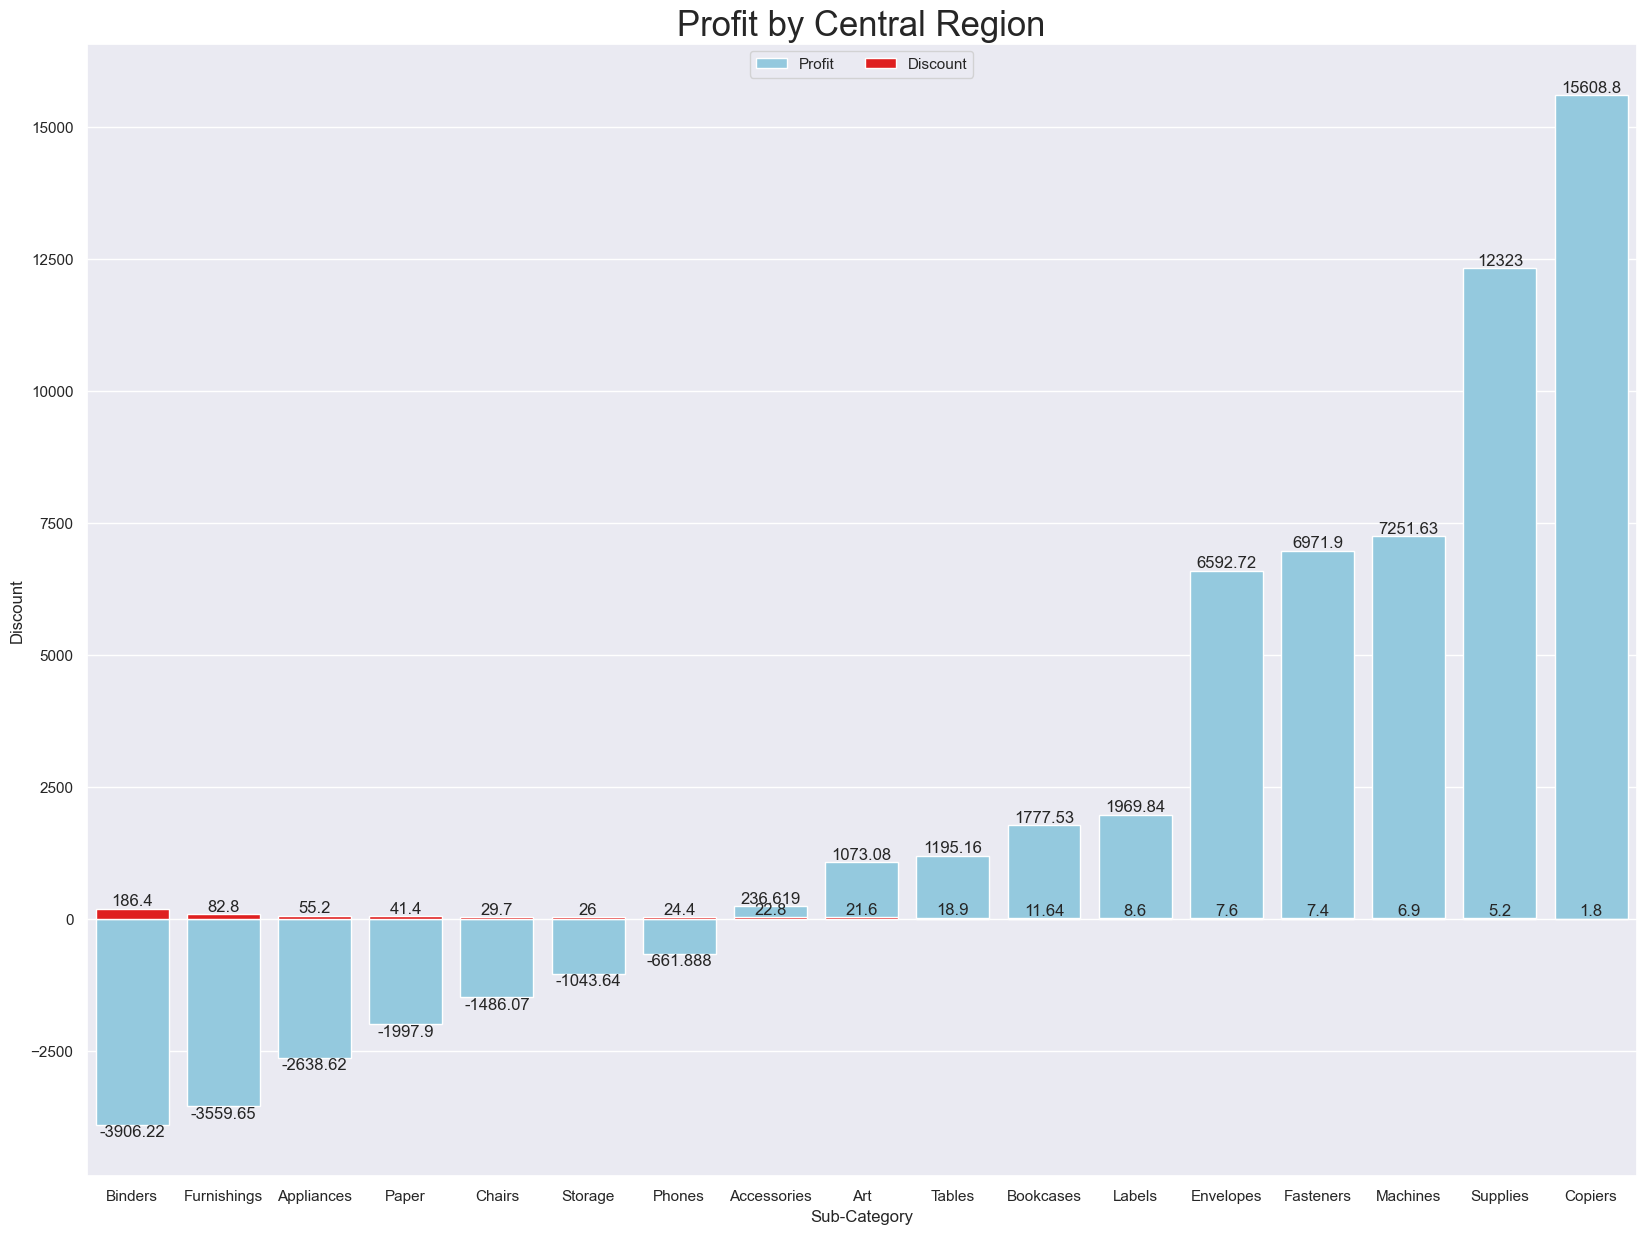

In [26]:
s3 = sns.barplot(x = "Sub-Category", y = "Profit", data = central, label="Profit", color = 'skyblue')
s4 = sns.barplot(x = "Sub-Category", y = "Discount", data=central_disc, label="Discount", color = "red")
sns.set(rc={"figure.figsize":(20, 15)})

for container in s4.containers:
    s4.bar_label(container)
    
plt.legend(ncol=2, loc="upper center", frameon=True)
plt.title("Profit by Central Region", size=25)
plt.show()

## Profit and Discount by State of Central Region
- Texas & Illinois were the Top 2 States contributed a Negative Profit Trend in Central Region due to the Highest Discounts, which might be a problem
- Other Sub-Category products of Central Region are in uptrend with no to little discounts given to the customers
- To sum this up, we can say that providing discounts might be a good fortune for the client in the long-term but in short-term the company is in dillemma

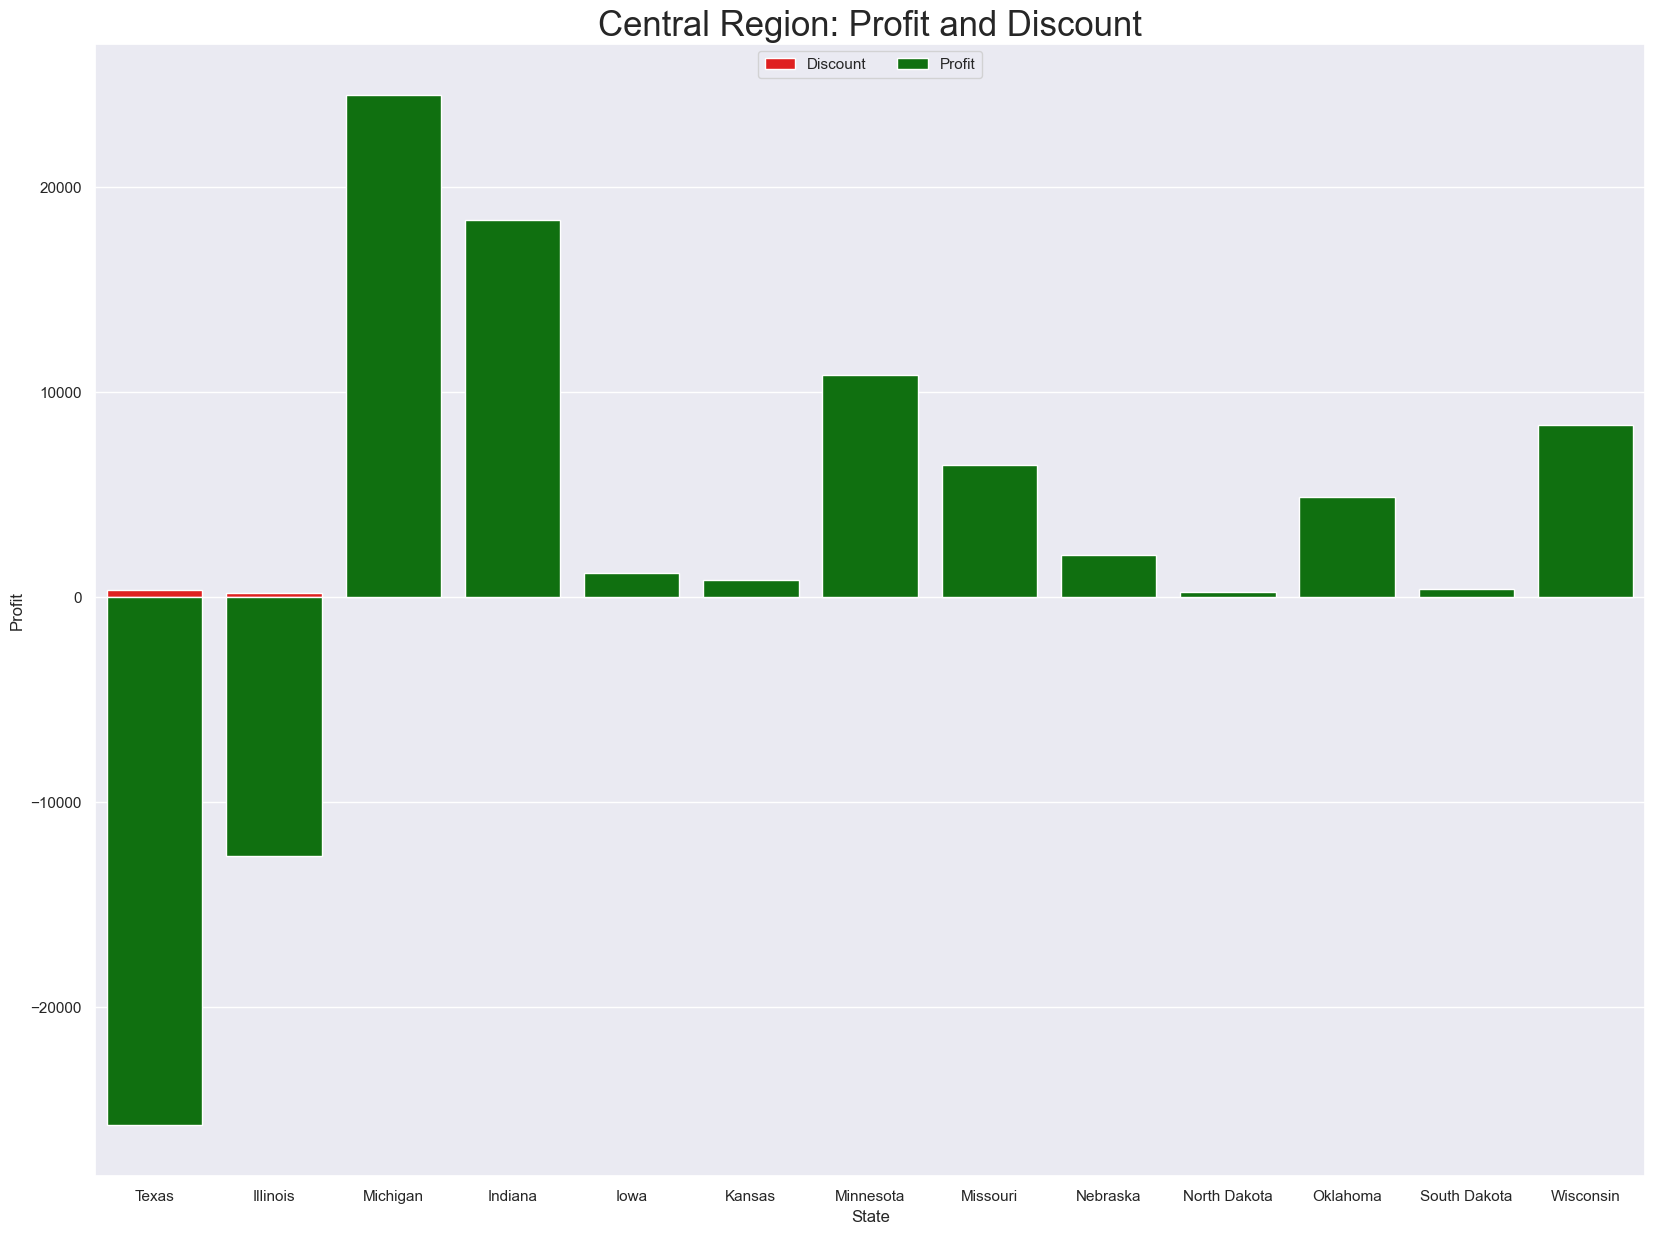

In [17]:
state_disc_cent = df_og[df_og["Region"] == "Central"]
state_disc = state_disc_cent.groupby("State",as_index=False).sum().sort_values(by="Discount", ascending=False).drop(columns = ["Postal Code", "Quantity"])


sns.barplot(x = "State", y = "Discount", data=state_disc, label="Discount", color = "red")
# sns.barplot(x = "State", y = "Sales", data=state_disc, label="Sales", color = "skyblue")
sns.barplot(x = "State", y = "Profit", data=state_disc, label="Profit", color = "green")

sns.set(rc={"figure.figsize":(15, 15)})

    
plt.legend(ncol=2, loc="upper center", frameon=True)
plt.title("Central Region: Profit and Discount", size=25)
plt.show()

In [28]:
state_check = state_disc.groupby("State").sum().sort_values(by="Profit", ascending=True).drop(columns=["Sales", "Discount"])
state_check.head()

,Profit
State,
Texas,-25729.3563
Illinois,-12607.8870
North Dakota,230.1497
South Dakota,394.8283
Kansas,836.4435


In [29]:
state_profit = pd.DataFrame(state_check["Profit"] / state_check["Profit"].sum())
state_check = state_profit.iloc[[0,1]]["Profit"].sum()
print("------------------------------------------------------------------------------")
print("Central Region Profit by State : " + str(state_profit.head()))
print("------------------------------------------------------------------------------")
print("Central Region Proft by Texas and Illinois State : " + str(state_check))
print("------------------------------------------------------------------------------")

------------------------------------------------------------------------------
Central Region Profit by State :                 Profit
State                 
Texas        -0.647991
Illinois     -0.317528
North Dakota  0.005796
South Dakota  0.009944
Kansas        0.021066
------------------------------------------------------------------------------
Central Region Proft by Texas and Illinois State : -0.9655188963733448
------------------------------------------------------------------------------


# City by Texas and Illinois in Central Region
- Business Owner might need to check these Top 5 City from Texas and Illinois that giving high discounts but negative profit in the business
- Highest Discounts gave ranging between 120-140

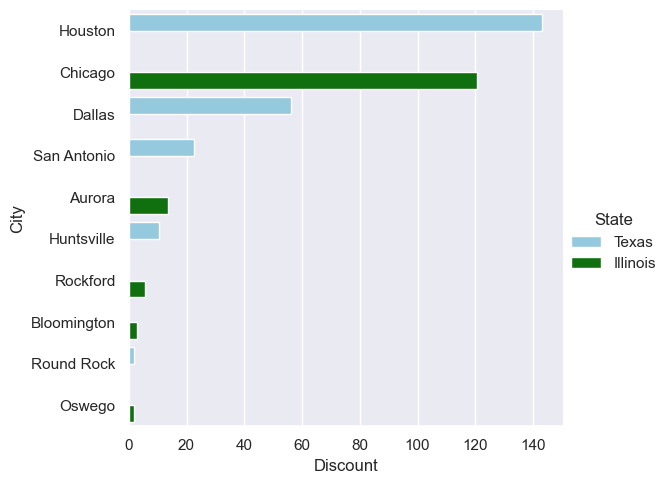

In [21]:
central_city = state_disc_cent.groupby(["State","City"],as_index=False).sum().sort_values(by="Profit", ascending=True).drop(columns = ["Postal Code", "Quantity"])
central_city1 = central_city[central_city["State"] == "Texas"].head(5).sort_values(by="Discount", ascending=False)
central_city2 = central_city[central_city["State"] == "Illinois"].head(5).sort_values(by="Discount", ascending=False)

frames = [central_city1, central_city2]
central_city_df = pd.concat(frames).sort_values(by="Discount", ascending=False)

g = sns.catplot(x="Discount", y="City",
                data=central_city_df, kind="bar", hue="State",
                height=5, aspect=1.2, palette = palette);


In [22]:
central_city1, central_city2

(     State         City       Sales  Discount      Profit
 146  Texas      Houston  64504.7604    143.14 -10153.5485
 135  Texas       Dallas  20131.9322     56.30  -2846.5257
 167  Texas  San Antonio  21843.5280     22.60  -7299.0502
 147  Texas   Huntsville   6710.6168     10.62   -843.4264
 165  Texas   Round Rock   4854.0528      1.92  -1183.4313,
        State         City      Sales  Discount     Profit
 7   Illinois      Chicago  48539.541     120.5 -6654.5688
 1   Illinois       Aurora   7572.968      13.4 -1894.7196
 26  Illinois     Rockford   3166.228       5.6 -1149.5078
 2   Illinois  Bloomington    963.940       2.9  -432.1283
 21  Illinois       Oswego    321.978       1.8  -536.1276)

# Conclusion

1. In terms of Region -- all other Regions are performing well in terms of Profit to Sales, however there was a high sales but low profit in Central Region.
    - This will be the focused of our anaylsis to identify the root cause of the low profit
2. In terms of Products -- Central was the 2nd Highest Profit compared to other Region in Technology but have the least Profit both in Furniture and Office Supplies
3. In terms of Sub-Categry -- we found that negative Profits might be correlated to the given discounts on these products
4. In terms of State -- checking the specifics, Texas and Illinois have the greatest discounts given in Central Region that leads to negative profit by **-96.55%**
5. In terms of City -- Houston from Texas and Chicago from Illinois are the Top Cities that giving high Discounts in the clients that causes the profit loss


Based on the given data, Central Region have the highest discounts but lowest Profit in Office Supplies and Furtniture Category from Central Region, that is damaging the over-all Profit of the Company. 

I, the Business Manager, might need to talk to Texas and Illinois' cities in Central Region that contributes the greatest profit loss even with the given discounts, how they operates their business, why there were high discounts given but still got a decreasing profit. Especially at Houston and Chicago.

Specifically, profit loss in central came from Binders, Furnishings, Appliances, Paper, Chairs, Storage and Phones. The sales operations of these items needs to be evaluated at the same time.

If I were able to identify what kind of selling methods and the business operations in these 2 states and cities and to these products I can reduce the loss and increase the profit over a period of time.